#[PyTorch Tutorial](https://pytorch.org/tutorials/index.html)

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F

from tqdm.notebook import tqdm

## 1. Load and normalizing the datasets using torchvision

The output of torchvision datasets are PILImage images of range [0, 1].



In [3]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])])

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128,
                                          shuffle=True, num_workers=8)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=128,
                                         shuffle=False, num_workers=8)

## 2. Define a Convolution Neural Network



##### Net w/ Dropout
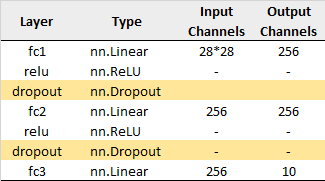

In [ ]:
class Net_with_dropout(nn.Module):
    def __init__(self, num_classes=10):
        super(Net_with_dropout, self).__init__()
        #########################################
        #
        #                your code
        # 
        #########################################
    def forward(self, x):
        #########################################
        #
        #                your code
        #
        # MNIST input size : (1 x 28 x 28) 
        #
        # 
        # 
        #########################################
        return out

##### Net w/o Dropout

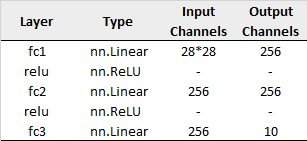

In [ ]:
class Net_without_dropout(nn.Module):
    def __init__(self, num_classes=10):
        super(Net_without_dropout, self).__init__()
        #########################################
        #
        #                your code
        #
        # 
        #
        # 
        # 
        #########################################
    def forward(self, x):
        #########################################
        #
        #                your code
        #
        # MNIST input size : (1 x 28 x 28) 
        #
        # 
        # 
        #########################################
        return out

In [ ]:
# net = Net_with_dropout()
# net = Net_without_dropout()
net = net.cuda()

## 3. Define a Loss function and optimizer

Let's use a Classification Cross-Entropy loss and SGD with momentum.



In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.1)

## 4. Train the network

This is when things start to get interesting.
We simply have to loop over our data iterator, and feed the inputs to the
network and optimize.



In [ ]:
import time

epochs = 15

for epoch in range(epochs):  # loop over the dataset multiple times

    net.train()

    running_loss = 0.0
    start = time.time()

    correct = 0
    total = 0
    for i, data in enumerate(tqdm(trainloader)):
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.cuda(), labels.cuda()

        # zero the parameter gradients
        optimizer.zero_grad()

        B, _, H, W = inputs.shape
        inputs = inputs.view(B, H*W)

        # forward + backward + optimize
        outputs = net(inputs)
        
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # print statistics
        running_loss += loss.item()

    end = time.time()
    print('(Train) [epoch : %d] loss: %.3f / time: %.3f / acc@1: %.3f' %
          (epoch + 1, running_loss / len(trainloader), (end-start), 100 * correct / total))

    net.eval()

    correct = 0
    total = 0
    with torch.no_grad():
        for data in tqdm(testloader):
            inputs, labels = data
            inputs, labels = inputs.cuda(), labels.cuda()

            B, _, H, W = inputs.shape
            inputs = inputs.view(B, H*W)

            outputs = net(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('(Test) Accuracy of the network on the 10000 test images: %.3f %%\n' % (
        100 * correct / total))

print('Finished Training')